In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("../data/merged.csv")
# Takes ~30 seconds to run

In [ ]:
columns = df.columns.tolist()

print(columns)

['bill_paid_at_local', 'bill_total_billed', 'bill_total_discount_item_level', 'bill_total_gratuity', 'bill_total_net', 'bill_total_tax', 'bill_total_voided', 'bill_uuid', 'business_date', 'order_duration_seconds', 'order_seated_at_local', 'order_closed_at_local', 'order_take_out_type_label', 'order_uuid', 'payment_amount', 'payment_count', 'payment_total_tip', 'sales_revenue_with_tax', 'venue_xref_id', 'waiter_uuid', 'concept', 'city', 'country', 'start_of_day_offset']


In [ ]:
def time_format(data):
    bill_day = []
    bill_hour = []
    bill_minute = []
    bill_second = []
    for i in data['bill_paid_at_local']:
        day = i.split(" ")[1]
        bill_hour.append(int(day.split(":")[0]))
        bill_minute.append(int(day.split(":")[1]))
        bill_second.append(int(day.split(":")[2]))

    data['bill_hour'] = bill_hour
    data['bill_minute'] = bill_minute
    data['bill_second'] = bill_second
    return data

df = time_format(df)
# print(new.head())
print(len(df))

8954786


In [19]:
df = df.dropna()
print(len(df))

7371239


# Histogram of Bills by the Hour

In [24]:
# Functions for plotting

def get_concept_data(data, concept):
    return data.loc[data['concept'] == concept]

def get_all_concept_data(data):
    concepts = data['concept'].unique()
    concept_data = {}
    for concept in concepts:
        concept_data[concept] = get_concept_data(data, concept)
    return concept_data

def plot_hist_by_hour(data, column, title=""):
    plt.figure(figsize=(8, 5)) 
    plt.hist(data[column], bins=24)
    plt.xticks(np.arange(0, 24, 1))
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()


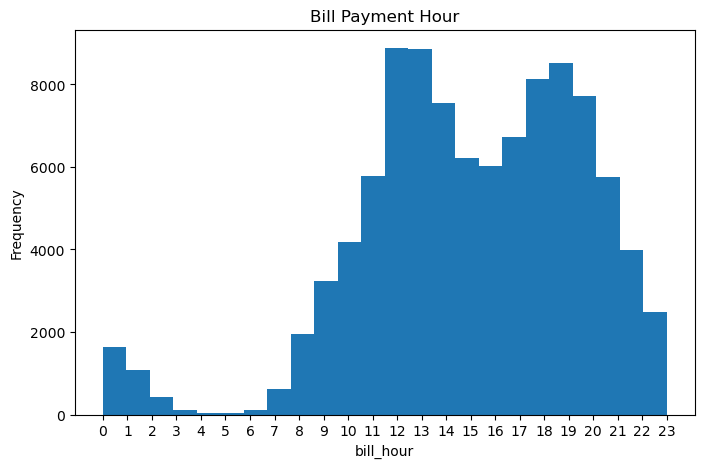

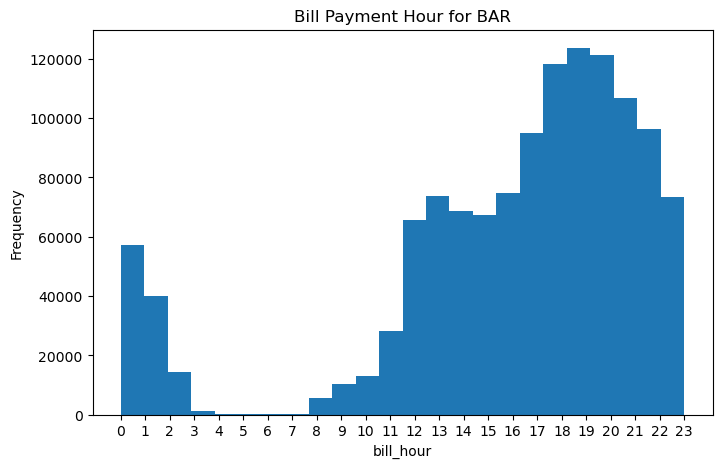

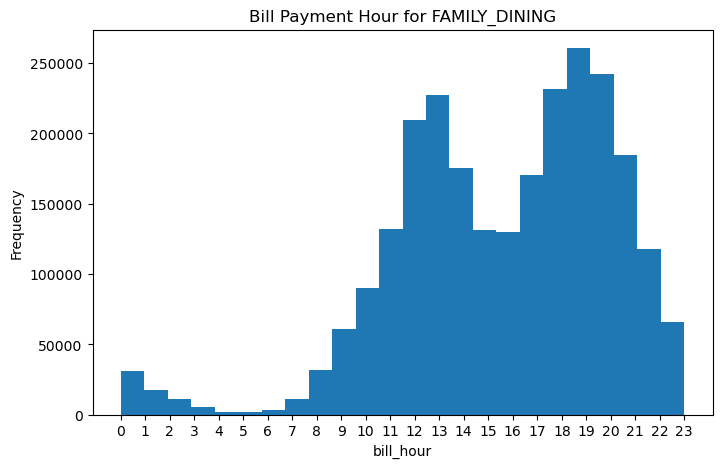

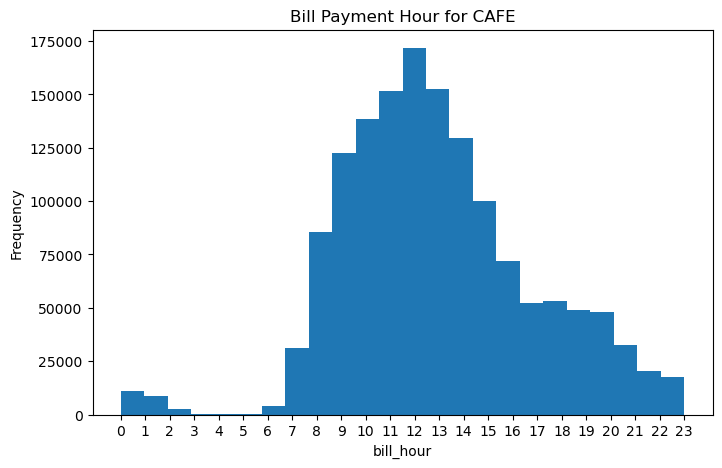

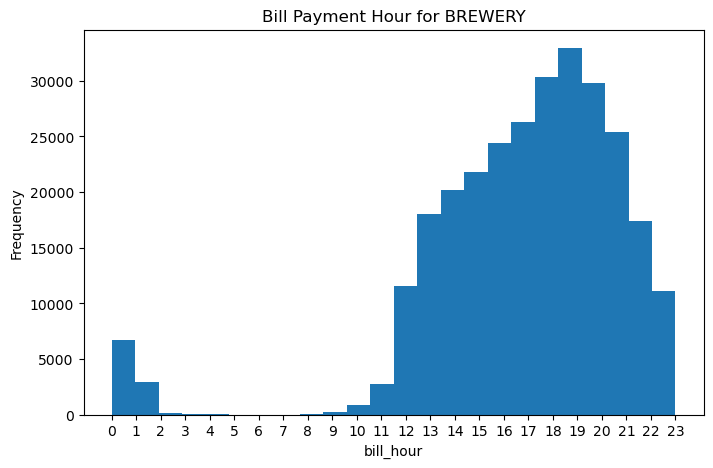

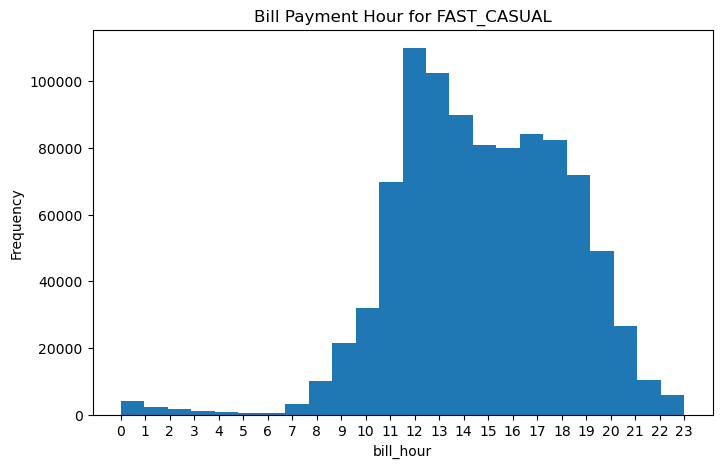

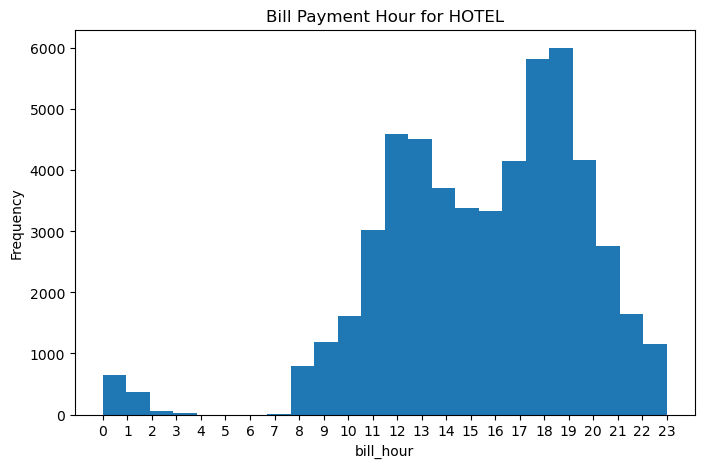

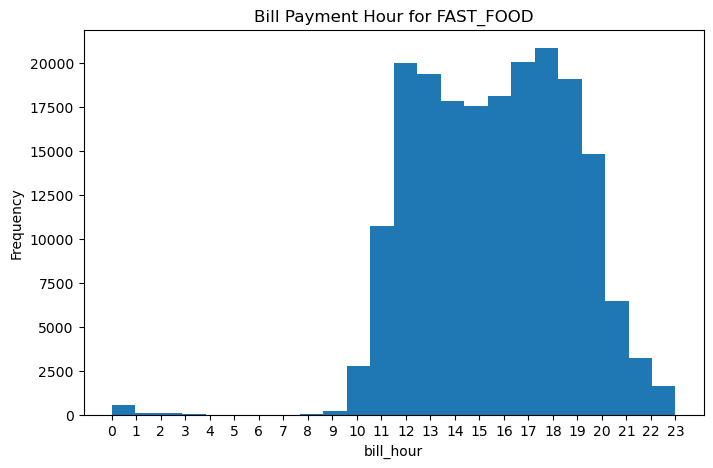

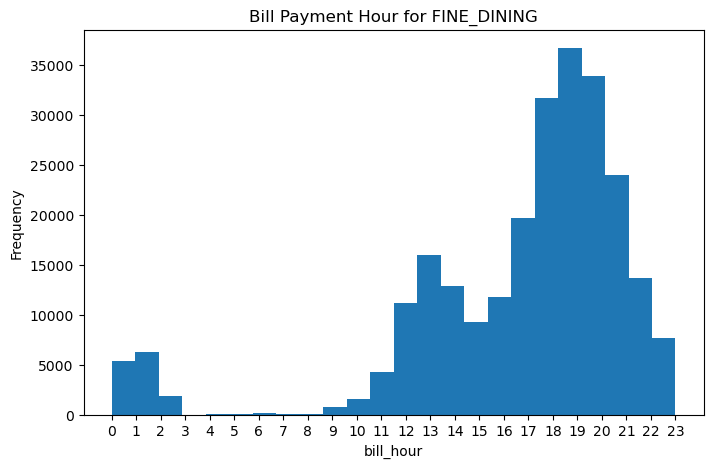

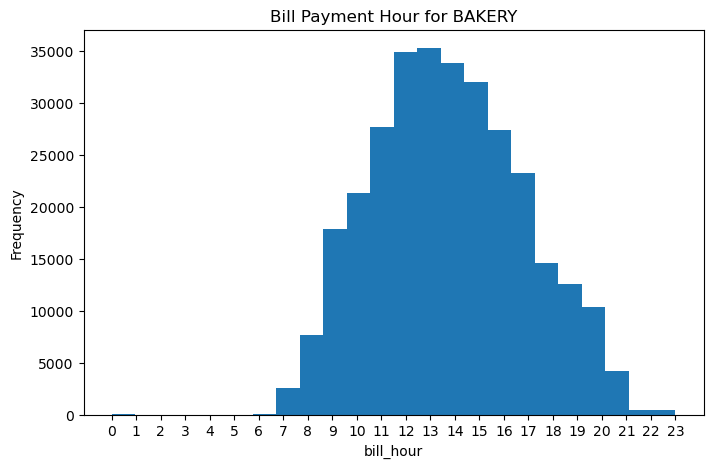

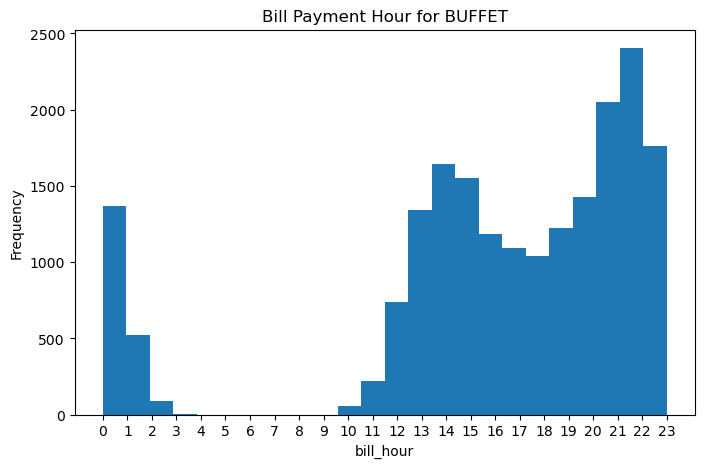

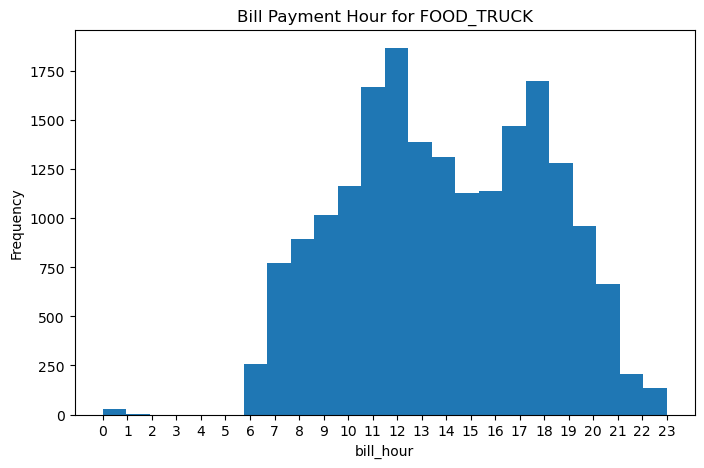

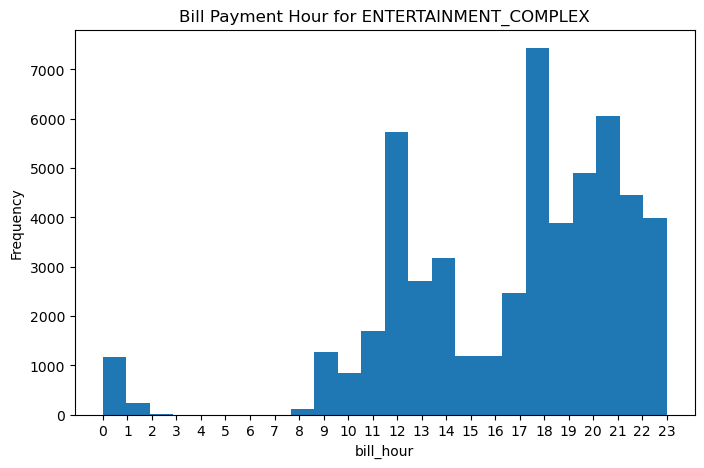

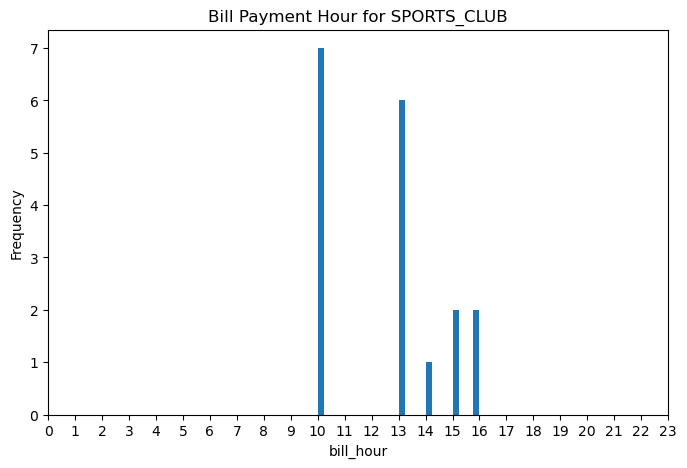

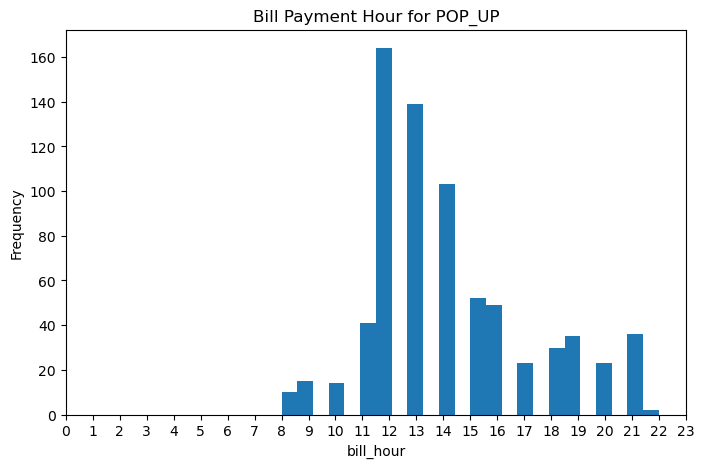

In [26]:
# Note: The actual data is around 9,000,000 rows, so it will take a bit of time to run

df_sampled = df.sample(n=min(len(df), 100000), random_state=42) # Only use 100,000 samples for speed

# Overall Sample of Everything
plot_hist_by_hour(df_sampled, 'bill_hour', 'Bill Payment Hour')

# Sample of each concept of restuarant
concept_data = get_all_concept_data(df)
for concept in concept_data:
    d = concept_data[concept]
    plot_hist_by_hour(d, 'bill_hour', f'Bill Payment Hour for {concept}')